In [1]:
import os
from serpapi import GoogleSearch
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, MWETokenizer
nltk.download('punkt') #Only used once

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\flari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
search_term = "front end develope"
search_location = "United States"

for num in range(35):
    
    start = num * 10
    params = {
        "api_key": "6deb514136db14b5b8426286f5ed9b9313b028c6f4a2f7dd2739589326d4d630",
        # Fill in with your API key from SerpApi
        "engine": "google_jobs",
        "google_domain": "google.com",
        "q": search_term,
        "hl": "en",
        "gl": "us",
        "location": search_location,
        "chips": "date_posted:week",
        "start": start,
    }

    search = GoogleSearch(params)
    results = search.get_dict()

    # check if the last search page (i.e., no results)
    try:
        if results['error'] == "Google hasn't returned any results for this query.":
            break
    except KeyError:
        print(f"Getting SerpAPI data for page: {start}")
    else:
        continue
        
    
    jobs_fe = results['jobs_results']
    jobs_fe = pd.DataFrame(jobs_fe)
    jobs_fe = pd.concat([pd.DataFrame(jobs_fe),
                    pd.json_normalize(jobs_fe['detected_extensions'])],
                    axis=1).drop('detected_extensions', 1)

    #jobs_ds
    
    # concat dataframe
    if start == 0:
        jobs_all_fe = jobs_fe
    else:
        jobs_all_fe = pd.concat([jobs_all_fe, jobs_fe])

    jobs_all_fe['search_term'] = search_term
    jobs_all_fe['search_location'] = search_location
    
    #jobs_all

https://serpapi.com/search
Getting SerpAPI data for page: 0
https://serpapi.com/search
Getting SerpAPI data for page: 10
https://serpapi.com/search
Getting SerpAPI data for page: 20
https://serpapi.com/search
Getting SerpAPI data for page: 30
https://serpapi.com/search
Getting SerpAPI data for page: 40
https://serpapi.com/search
Getting SerpAPI data for page: 50
https://serpapi.com/search
Getting SerpAPI data for page: 60
https://serpapi.com/search
Getting SerpAPI data for page: 70
https://serpapi.com/search
Getting SerpAPI data for page: 80
https://serpapi.com/search
Getting SerpAPI data for page: 90
https://serpapi.com/search
Getting SerpAPI data for page: 100
https://serpapi.com/search
Getting SerpAPI data for page: 110
https://serpapi.com/search
Getting SerpAPI data for page: 120
https://serpapi.com/search
Getting SerpAPI data for page: 130
https://serpapi.com/search
Getting SerpAPI data for page: 140
https://serpapi.com/search
Getting SerpAPI data for page: 150
https://serpapi.com

In [ ]:
jobs_fe

In [4]:
jobs_all_fe.to_csv("C:/Users/flari/PycharmProjects/pythonProject1/dev_fe5.csv", index=False)

In [44]:
df_fe = pd.read_csv('C:/Users/flari/PycharmProjects/pythonProject1/dev_fe5.csv')

In [45]:
#Tamanho do Banco de Dados
print(f"\n🚣‍♀️ Rows of data: {len(df_fe)}\n")


🚣‍♀️ Rows of data: 181



In [46]:
#Trabalhos repetidos
repeat_jobs = df_fe.job_id.value_counts()
try:
    repeat_jobs = repeat_jobs[repeat_jobs>1].index[0]
    repeat_jobs = len(repeat_jobs)
except IndexError:
    repeat_jobs = "None"
print(f"\n👯‍♀️ Number jobs repeated: {repeat_jobs}\n")


👯‍♀️ Number jobs repeated: None



In [47]:
#Cleaning the title of the job, to standardize them all
df_fe['title'] = df_fe['title'].replace(['Frontend', 'frontend', 'front-end'], ['Sr'], 'Front End', 'Senior')

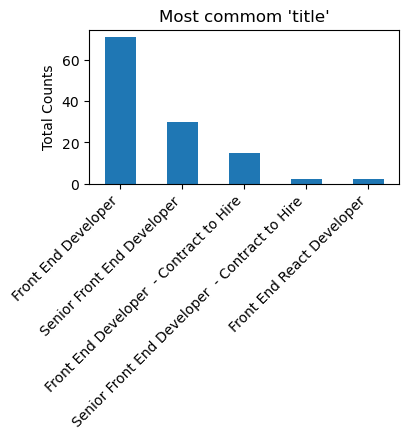

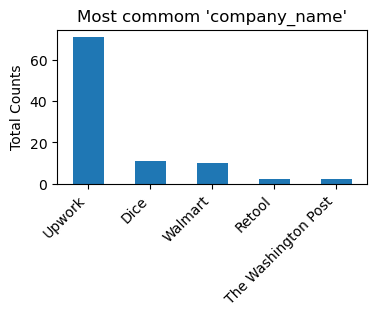

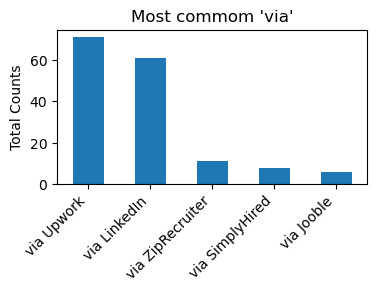

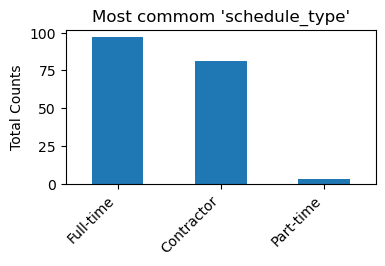

In [62]:
#Graficos das colunas
def eda_plot(column, topn=5):
    plt.figure(figsize=(4, 2))
    df_fe[column].value_counts().nlargest(topn).plot(kind='bar')
    plt.title(f"Most commom '{column}'")
    plt.ylabel("Total Counts")
    plt.xticks(rotation = 45, ha='right')
    plt.show()

columns = ['title', 'company_name', 'via', 'schedule_type']

for column in columns:
    eda_plot(column)

In [ ]:
#Vamos precisar limpar os dados, já que temos muitos nomes repetidos para a mesma coisa
#front_end_names = ['Front-End', 'Front-end', 'Front End Web', 'Web Frontend', 'Frontend']

#df_fe['title'] = df_fe['title'].replace(['Front-End', 'Front-end', 'Front End Web', 'Web Frontend', 'Frontend'], 'Front End')

In [49]:
#Porcentagem de Trabalhos home-office
true_count = df_fe['work_from_home'].sum()
false_count = len(df_fe) - true_count

# Calculate the percentage of True and False values
true_percentage = true_count / df_fe[column].count() * 100
false_percentage = false_count / df_fe[column].count() * 100

print("\nPercentage of jobs that are Remote 👨‍💻: {:.2f}%\n".format(true_percentage))
print("Percentage of On-Site or Hybrid jobs 🏨: {:.2f}%\n".format(false_percentage))


Percentage of jobs that are Remote 👨‍💻: 77.90%

Percentage of On-Site or Hybrid jobs 🏨: 22.10%



In [50]:
#Habilidades mais Requeridas
keywords_programming = [
'sql', 'python', 'r', 'c', 'c#', 'javascript',  'java', 'scala', 'sas', 'matlab', 
'c++', 'c/c++', 'perl', 'go', 'bash', 'php', 'powershell', 'rust', 
'kotlin', 'ruby',  'dart', 'assembly', 'swift', 'vba', 'lua', 'groovy', 'delphi', 'objective-c', 
'haskell', 'elixir', 'julia', 'clojure', 'solidity', 'lisp', 'f#', 'fortran', 'erlang', 'apl', 
'cobol', 'ocaml', 'crystal', 'javascript/typescript', 'golang', 'nosql', 'mongodb', 't-sql', 'no-sql',
'visual_basic', 'pascal', 'mongo', 'pl/sql', 'vb.net', 'mssql', 
'java', 'dart'
]

keywords_framewors_and_libs = [
 'susy','svelte', 'bulma', 'uikit', 'vue', 'react', 'ember', 'next', 'angular', 'typescript', 'elm', 'jquery', 'rust', 'google material'
]

keywords_tools = [
'html', 'css',  'backbone.js', 'sass', 'bootstrap', 'foundation', 'wordpress'  
]

In [51]:
keywords = keywords_programming + keywords_framewors_and_libs + keywords_tools

In [52]:
df_fe = df_fe[df_fe.description.notnull()] # filter out null values
#df = df.reset_index() # throwing index issues if don't reset index

df_fe['description_tokens'] = ""
for index, row in df_fe.iterrows():
    # lowercase words
    detail = row.description.lower()
    # tokenize words
    detail = word_tokenize(detail)
    # handle multi-word tokenization (e.g., 'Power BI')
    multi_tokens = [('google', 'material'), ('data', 'lake'), ('data', 'lakes'), ('machine', 'learning'), ('objective', 'c'),
                    ('visual', 'basic'), ('predictive', 'prediction'), ('plotly','express'), ('ggplot','ggplot'), ('d3','js') ]

    tokenizer = MWETokenizer(multi_tokens)
    detail = tokenizer.tokenize(detail)
    # remove duplicates
    detail = list(set(detail))
    # filter for keywords only
    detail = [word for word in detail if word in keywords] 
    # replace duplicate keywords
    replace_tokens = {'spreadsheets': 'spreadsheet'}
    for key, value in replace_tokens.items():
        detail = [d.replace(key, value) for d in detail]
    # add to details list # row.description_tokens = detail
    df_fe.at[index, 'description_tokens'] = detail    
    

In [53]:
def filtered_keywords(jobs_filtered, keywords, save_as, title="Keyword Analysis", head=20):
    # get keywords in a column
    count_keywords = pd.DataFrame(jobs_filtered.description_tokens.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')

    # get frequency of occurence of word (as word only appears once per line)
    length = len(jobs_filtered) # number of job postings
    count_keywords['percentage'] = 100 * count_keywords.counts / length

    # plot the results
    count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
    count_keywords = count_keywords.head(head)
    g = plt.bar(x="keywords", height="percentage", data=count_keywords , color=np.random.rand(len(count_keywords.keywords), 3))
    plt.xlabel("")
    plt.ylabel("Likelyhood to be in job posting (%)")
    plt.xticks(rotation = 45, ha='right')
    plt.title(title) 
    plt.show(g)
    count_keywords.to_csv( save_as )
    return print(save_as)

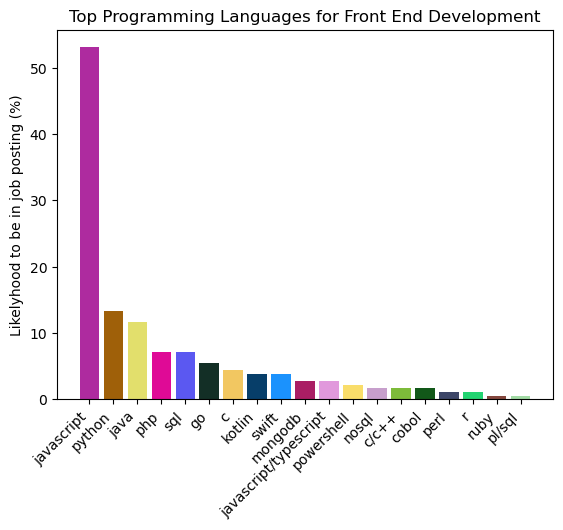

kw_programming_fe.csv


In [54]:
filtered_keywords(df_fe, keywords_programming, save_as='kw_programming_fe.csv', title="Top Programming Languages for Front End Development")

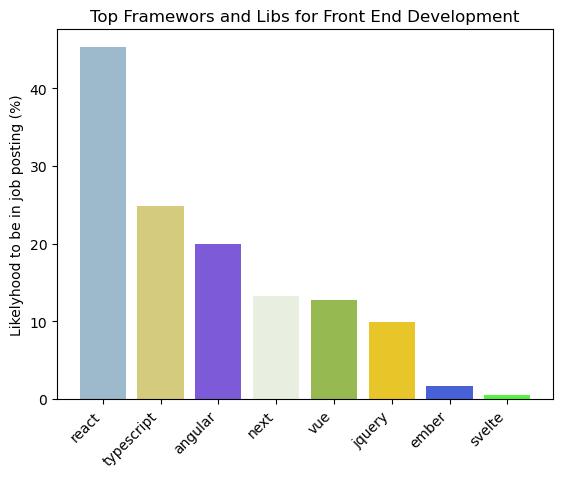

kw_top_frameworks_for_front_end_development.csv


In [56]:
filtered_keywords(df_fe, keywords_framewors_and_libs, save_as='kw_top_frameworks_for_front_end_development.csv', title="Top Framewors and Libs for Front End Development")

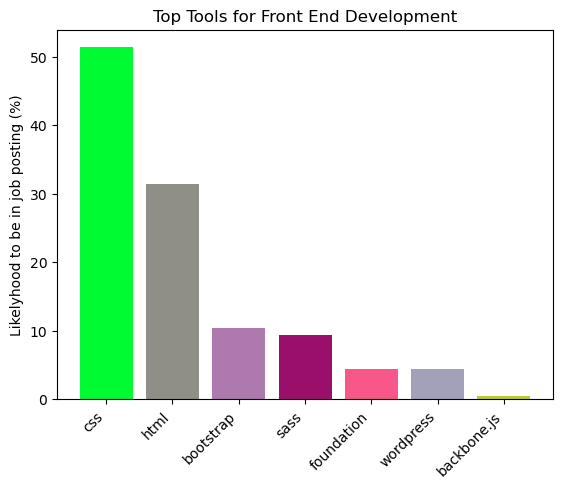

kw_top_tools_for_front_end_development.csv


In [57]:
filtered_keywords(df_fe, keywords_tools, save_as='kw_top_tools_for_front_end_development.csv', title="Top Tools for Front End Development")